# Approximation einer nichtlinearen Kurve mit Splines


In dieser Aufgabe verwenden wir Splines, um eine nichtlineare Funktion zu approximieren. Splines bestehen aus stückweise definierten kubischen Polynomen, die an den Übergangsstellen (Knotenpunkten) stetig bis zur zweiten Ableitung sind.

Wir verwenden die `scipy.interpolate`-Bibliothek und visualisieren das Ergebnis mit `matplotlib`.

Die gewählte Funktion zur Approximation ist:

$$
f(x) = \sin(x) + 0.5 \cdot \cos(2x)
$$

im Intervall $[0, 2\pi]$.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Exakte Funktion
def f(x):
    return np.sin(x) + 0.5 * np.cos(2 * x)

# Intervall
min = 0
max = 2
x_exact = np.linspace(min, max, 1000)
y_exact = f(x_exact)


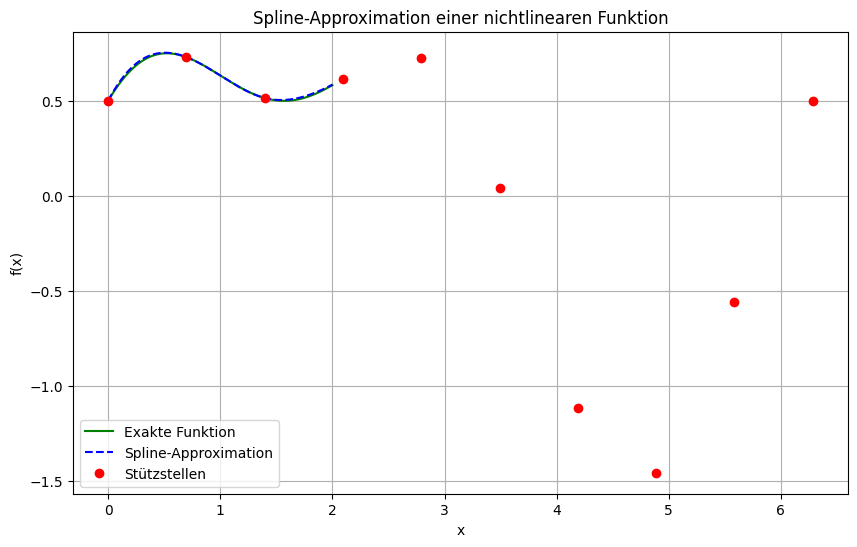

In [2]:

# Anzahl der Stützstellen
n_points = 10
x_nodes = np.linspace(0, 2 * np.pi, n_points)
y_nodes = f(x_nodes)

# Spline-Interpolation
spline = CubicSpline(x_nodes, y_nodes)

# Spline-Werte berechnen
y_spline = spline(x_exact)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_exact, y_exact, label='Exakte Funktion', color='green')
plt.plot(x_exact, y_spline, label='Spline-Approximation', linestyle='--', color='blue')
plt.plot(x_nodes, y_nodes, 'o', label='Stützstellen', color='red')
plt.legend()
plt.title('Spline-Approximation einer nichtlinearen Funktion')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()



## Diskussion

**Beurteilung der Qualität der Approximation:**  
Die Qualität der Approximation lässt sich visuell durch den Vergleich der Spline-Kurve mit der exakten Funktion beurteilen. Zusätzlich kann ein Fehlermass wie der mittlere quadratische Fehler verwendet werden.

**Einfluss der Anzahl Stützstellen:**  
Je mehr Stützstellen verwendet werden, desto besser kann die Spline-Kurve der exakten Funktion folgen, insbesondere in Bereichen hoher Krümmung.

**Verbesserung der Approximation:**  
- Erhöhung der Anzahl Stützstellen
- Auswahl der Stützstellen basierend auf der Krümmung der Funktion (adaptive Punktwahl)
- Nutzung glatterer Splinetypen oder regularisierter Splines

### Fehlerberechnung


In [3]:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_exact, y_spline)
print(f"Mittlerer quadratischer Fehler (MSE): {mse:.6f}")


Mittlerer quadratischer Fehler (MSE): 0.000024


Der mittlere quadratische Fehler (MSE) misst, wie stark die Spline-Approximation von der exakten Funktion abweicht. Dazu werden die Abweichungen an vielen Punkten quadriert und gemittelt.
Ein kleiner MSE bedeutet eine gute Approximation.
Die Fehlerberechnung liefert eine objektive Kennzahl, um die Qualität der Approximation zu bewerten und verschiedene Einstellungen vergleichen zu können.